### Read RBR data without Ruskin program

The RBR raw data in .rsk files is a SQLite file - well described and readable without the need for proprietary software.  

Can we open, read and plot the RBR data (and perform and unit conversions) without the software?  The software does internal calcaluations of Salinity and Pressure corrections as well as possibly calibration corrections?

*** This is just a test and proof of concept ***


In [32]:
# Visual Stack

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [52]:
import sqlite3
import pandas as pd
import numpy as np

In [89]:
data_file = '/Users/bell/ecoraid/2018/CTDcasts/AQ1801/raw/2018_aquila_rbr/AQ1801cast025.rsk'
db = sqlite3.connect(data_file)

query = 'SELECT * FROM channels'
columns = pd.read_sql_query(query,db)

In [90]:
query = 'SELECT * FROM data'

df_r = pd.read_sql_query(query,db)

In [91]:
columns

,channelID,shortName,longName,units,longNamePlainText,unitsPlainText,isMeasured,isDerived
0,1,cond10,Conductivity,mS/cm,Conductivity,mS/cm,1,0
1,2,temp14,Temperature,°C,Temperature,Degrees_C,1,0
2,3,pres24,Pressure,dbar,Pressure,dbar,1,0
3,4,pres08,Sea pressure,dbar,Sea pressure,dbar,0,1
4,5,dpth01,Depth,m,Depth,m,0,1
5,6,sal_00,Salinity,PSU,Salinity,PSU,0,1
6,7,sos_00,Speed of sound,m/s,Speed of sound,m/s,0,1
7,8,scon00,Specific conductivity,µS/cm,Specific conductivity,uS/cm,0,1
8,9,temp22,Temperature,°C,Temperature,Degrees_C,1,0


In [92]:
df_r.head()

,tstamp,channel01,channel02,channel03,channel04,channel05,channel06,channel07,channel08,channel09
0,1539235856000,0.003990,8.706055,9.933628,-0.198873,-0.197651,0.005913,1442.063965,5.792885,8.579163
1,1539235856125,0.003421,8.700104,9.934276,-0.198225,-0.197007,0.005614,1442.039185,4.967183,8.579163
2,1539235856250,0.003704,8.697083,9.928201,-0.204300,-0.203045,0.005759,1442.026855,5.379005,8.503021
3,1539235856375,0.005147,8.696289,9.930402,-0.202099,-0.200857,0.006530,1442.024780,7.474463,8.541138
4,1539235856500,0.004292,8.693542,9.924590,-0.207911,-0.206633,0.006067,1442.012817,6.232984,8.464905


### Given the raw data above, can we calculate salinity using the thermodynamic equation of state and how does that compare to the RBR Ruskin Processed Data?

In [93]:
import seawater

In [94]:
conductivity = df_r.channel01
temperature = df_r.channel02
pressure = df_r.channel03 - 10.1325 #subtract standard atmosphere

df_r['salinity'] = seawater.salt(conductivity/42.914,temperature,pressure)

In [95]:
df_e = pd.read_excel('/Users/bell/ecoraid/2018/CTDcasts/AQ1801/rawconverted/rbr/AQ1801cast019_3.xlsx','Data',skiprows=1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bell/ecoraid/2018/CTDcasts/AQ1801/rawconverted/rbr/AQ1801cast019_3.xlsx'

(<Figure size 396x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11bea7be0>)

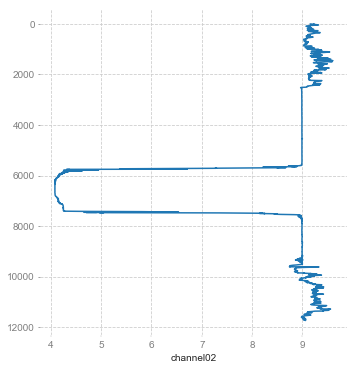

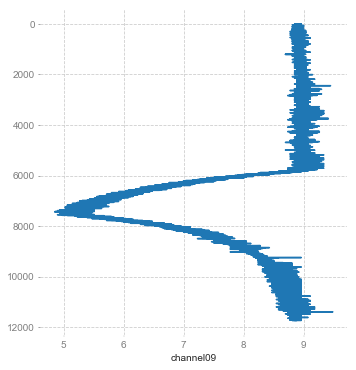

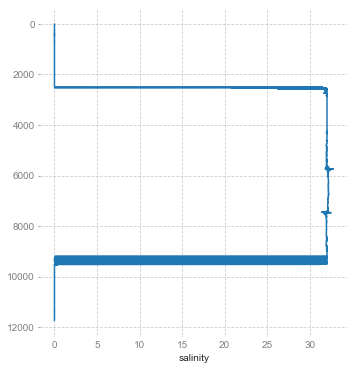

In [80]:
temperature.plot()
df_r['channel09'].plot()
df_r['salinity'].plot()
#df_r['channel10'].plot() #smoothed version of channel09

### Readin collocated CNV

In [25]:
import ctd


In [96]:
f = '/Users/bell/ecoraid/2018/CTDcasts/AQ1801/raw/CTD/datcnv_only/ctd025.cnv'
fp = '/Users/bell/ecoraid/2018/CTDcasts/AQ1801/raw/CTD/ctd025.cnv'

In [97]:
ctd_df = ctd.from_cnv(f)
ctd_dfp = ctd.from_cnv(fp)

In [98]:
ctd_df.describe()


,c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,turbWETntu0,prDM.1,sal00,sal11
count,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000,14043.000000
mean,32.111455,32.109349,1.074692,2.202799,6.013027,6.014037,292.541667,2.135189,1.223791,0.751593,37.765263,32.408309,32.404989
std,2.217383,2.217225,0.987139,0.286887,2.746166,2.746089,168.917052,0.279872,0.153368,0.531172,23.916055,0.148926,0.149343
min,30.081475,30.078948,0.115600,1.887600,3.487100,3.487300,0.000000,1.832600,1.116300,0.228100,0.114000,31.992900,31.977900
25%,30.110677,30.108190,0.201100,1.899800,3.500700,3.500800,146.271000,1.841200,1.171400,0.325800,17.226500,32.253500,32.249350
50%,30.123734,30.121683,0.218200,2.097600,3.670400,3.662900,292.542000,2.015800,1.176300,0.325800,37.361000,32.426700,32.423100
75%,34.609322,34.607409,2.218200,2.523900,9.116750,9.117200,438.812500,2.448200,1.177900,1.351400,58.687000,32.564200,32.561850
max,34.671803,34.670114,2.543000,2.538500,9.150300,9.151800,585.083000,2.459100,2.232800,1.693300,75.659000,32.589100,32.588700


### Plot Seabird and RBR on top of each other

In [109]:
class CTDProfilePlot(object):


    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='seaborn-ticks'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        self.max_xticks = 10
        plt.style.use(stylesheet)
        mpl.rcParams['svg.fonttype'] = 'none'
        mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['axes.grid'] = True
        mpl.rcParams['axes.edgecolor'] = 'white'
        mpl.rcParams['axes.linewidth'] = 0.25
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['xtick.major.size'] = 2
        mpl.rcParams['xtick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.major.size'] = 2
        mpl.rcParams['ytick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.direction'] = 'out'
        mpl.rcParams['xtick.direction'] = 'out'
        mpl.rcParams['ytick.color'] = 'grey'
        mpl.rcParams['xtick.color'] = 'grey'
        
    def plot2var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, secondary=False, **kwargs):
      fig = plt.figure(1)
      ax1 = fig.add_subplot(111)
      p1 = ax1.plot(xdata[0], ydata[0])
      plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'])
      if secondary and not (xdata[1].size == 0):
        p1 = ax1.plot(xdata[1],ydata[1])
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

      ax1.invert_yaxis()
      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')
    
      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
      ax1.xaxis.set_major_formatter(fmt)
      ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)

      #plot second param
      ax2 = ax1.twiny()
      p1 = ax2.plot(xdata[2], ydata[0])
      plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                   linestyle=self.var2format(epic_key[2])['linestyle'],
                   linewidth=self.var2format(epic_key[2])['linewidth'])
      if secondary and not (xdata[3].size == 0):
        p1 = ax2.plot(xdata[3],ydata[1])
        plt.setp(p1, color=self.var2format(epic_key[3])['color'],
                     linestyle=self.var2format(epic_key[3])['linestyle'],
                     linewidth=self.var2format(epic_key[3])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
        abmax=np.max([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
        try:
          ax2.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])
        except:
          ax2.set_xlim([0,1])

      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[1], fontsize=self.labelsize, fontweight='bold')

      #set xticks and labels to be at the same spot for all three vars
      ax1.set_xticks(np.linspace(ax1.get_xbound()[0], ax1.get_xbound()[1], self.max_xticks))
      ax2.set_xticks(np.linspace(ax2.get_xbound()[0], ax2.get_xbound()[1], self.max_xticks))

      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[2])['format'])
      ax2.xaxis.set_major_formatter(fmt)
      ax2.tick_params(axis='x', which='major', labelsize=self.labelsize)


      return plt, fig

    @staticmethod
    def var2format(epic_key):
      """list of plot specifics based on variable name"""
      plotdic={}
      if epic_key in ['T_28']:
        plotdic['color']='red'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['T2_35']:
        plotdic['color']='magenta'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['S_41', 'OST_62', 'O_65']:
        plotdic['color']='blue'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        if epic_key in ['S_41']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['S_42', 'CTDOST_4220', 'CTDOXY_4221']:
        plotdic['color']='cyan'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:3.1f}'
        if epic_key in ['S_42']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['ST_70','Trb_980','SigmaT']:
        plotdic['color']='black'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['F_903','fWS_973','Fch_906']:
        plotdic['color']='green'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.2f}'
      elif epic_key in ['PAR_905']:
        plotdic['color']='darkorange'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.75
        plotdic['format']='{x:5.0f}'
      else:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=1.0      
        plotdic['format']='{x:.3f}'

      return plotdic

    @staticmethod
    #python3 change as dictionaries no longer have itervalues methods
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

### Raw CTD

In [100]:
ctd_data = CTDProfilePlot()

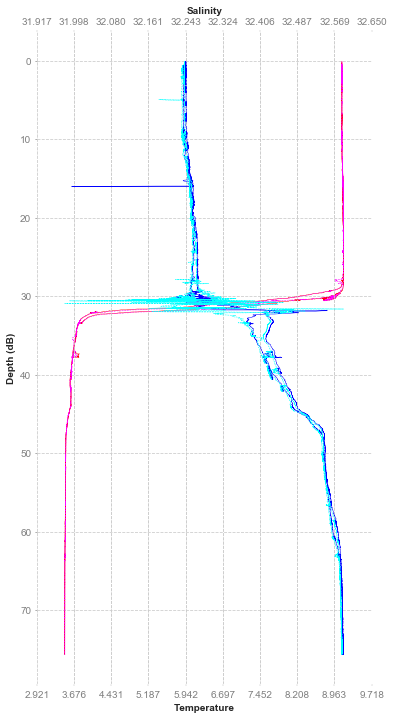

In [103]:
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                  ydata=ctd_df.index,
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','raw.png'))

### Initial Processing CTD

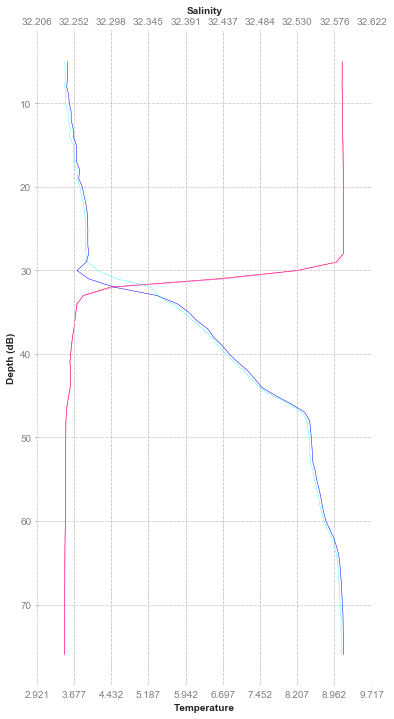

In [104]:
ctd_data = CTDProfilePlot()

plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_dfp.t090C,ctd_dfp.t190C,ctd_dfp.sal00,ctd_dfp.sal11],
                  ydata=ctd_dfp.index,
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','.png'))

### RBR Raw CTD

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


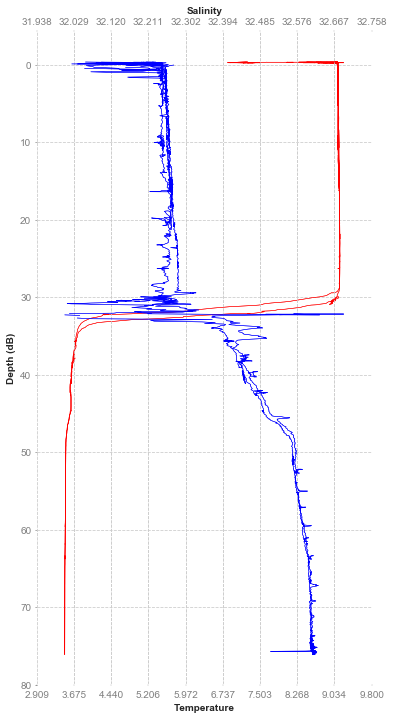

In [111]:
#filter out the on deck <32psu data
df_r['salinity'][df_r['salinity'] < 32] = np.nan

ctd_data = CTDProfilePlot()

plt,fig =ctd_data.plot2var(epic_key=['T_28','T_28','S_41','S_41'],
                  xdata=[temperature,temperature,df_r['salinity'],df_r['salinity']],
                  ydata=[pressure,pressure],
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','rbr.png'))

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


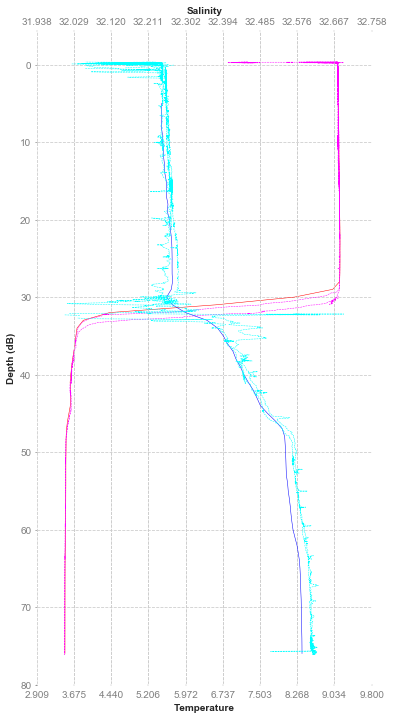

In [114]:
### Both Instruments - seabird processed

#filter out the on deck <32psu data
df_r['salinity'][df_r['salinity'] < 32] = np.nan

ctd_data = CTDProfilePlot()

plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_dfp.t090C,temperature,ctd_dfp.sal00,df_r['salinity']],
                  ydata=[ctd_dfp.index,pressure],
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','sbeproc_rbr.png'))

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


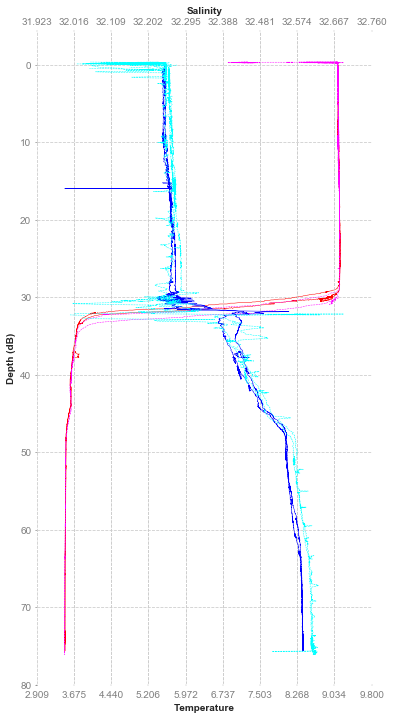

In [113]:
### Both Instruments - seabird processed

#filter out the on deck <32psu data
df_r['salinity'][df_r['salinity'] < 32] = np.nan

ctd_data = CTDProfilePlot()

plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_df.t090C,temperature,ctd_df.sal00,df_r['salinity']],
                  ydata=[ctd_df.index,pressure],
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','sberaw_rbr.png'))